In [1]:
import pyvista as pv
import numpy as np
import pydicom as dcm
import cv2
import os,sys


In [2]:
sys.path.append('../')
from Slice_Selection.slice_selection import *

In [3]:

def calculate_dice_score_3d(volume1, volume2):
    assert volume1.shape == volume2.shape, "Volumes must have the same shape"

    intersection = np.logical_and(volume1, volume2).sum()
    union = volume1.sum() + volume2.sum()

    dice_score = 2 * intersection / union

    return dice_score

# # Example usage with 3D volumes
# volume1 = np.random.randint(0, 2, size=(64, 64, 64))  # Example binary volume
# volume2 = np.random.randint(0, 2, size=(64, 64, 64))  # Example binary volume

# dice_score_3d = calculate_dice_score_3d(volume1, volume2)
# print(f"Dice score (3D): {dice_score_3d:.4f}")

In [4]:
def xyz_to_image_coords(X,Y,Z,spacing,origin):
    X_new, Y_new, Z_new = [], [], []
    for x,y,z in zip(X,Y,Z):
        X_new.append((x-origin[0])/spacing[0])
        Y_new.append((y-origin[1])/spacing[1])
        Z_new.append((z-origin[2])/spacing[2])
    
    return X_new, Y_new, Z_new

In [5]:
def xyz_to_image_coords_3D(contour,spacing,origin):
    
    image_coords = []
    for slice in contour:
        new_line = []
        for i in range(0,len(slice),3):
            new_line.append((slice[i]-origin[0])/spacing[0])
            new_line.append((slice[i+1]-origin[1])/spacing[1])
            new_line.append((slice[i+2]-origin[2])/spacing[2])
#             print(slice[i+2],origin[2],spacing[2],'=',(slice[i+2]-origin[2])/spacing[2])
        
#         x_indices, y_indices, z_indices = slice[0::3], slice[1::3], slice[2::3]
#         x,y,z = xyz_to_image_coords_contour(x_indices,y_indices,z_indices,spacing,origin)
        image_coords.append(new_line)
        
    return image_coords
        

In [6]:
def convert_contours_to_volume(contours):
    """
    Convert a list of 2D contours to a 3D binary volume.

    Args:
        contours (list of np.ndarray): List of binary masks (contours).

    Returns:
        np.ndarray: 3D binary volume.
    """
    # Determine the dimensions of the 3D volume
    num_slices, height, width = len(contours), contours[0].shape[0], contours[0].shape[1]

    # Initialize an empty 3D volume
    volume = np.zeros((num_slices, height, width), dtype=np.uint8)

    # Stack the 2D contours to create the 3D volume
    for i, contour in enumerate(contours):
        volume[i, :, :] = contour

    return volume


In [7]:
# PATH = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/' 
# patient = '22'
# CT = '20180921_CT_13_SEP_2018'
# CT_dcm = dcm.read_file(PATH+patient+'/'+CT+'/'+[f for f in os.listdir(PATH+patient+'/'+CT) if 'CT' in f][0])
RS_AI_OG = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.27944685974298517235273490150576291706.dcm')
RS_AI_A = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.10226744751331547397587265316063475652.dcm')
RS_743 = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/OG_CT/RS.1.2.246.352.221.54162806448186087767563333417651109794.dcm')

# RS_limb = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/22/RS.1.2.246.352.205.5548404720262746199.8088424948936543396.dcm')
# RS_22 = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/22/20180921_CT_13_SEP_2018/RS.1.2.246.352.221.573469055763021206212901379500416462245.dcm')

In [8]:
#743
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/' 
# patient = '743'
# CT = '20180921_CT_13_SEP_2018'
ct_path = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/Anon_CT/'
CT_dcm = dcm.read_file(ct_path+[f for f in os.listdir(ct_path) if 'CT' in f][0])
RS_AI_OG = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.27944685974298517235273490150576291706.dcm')
RS_AI_A = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.10226744751331547397587265316063475652.dcm')
RS_743 = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/OG_CT/RS.1.2.246.352.221.54162806448186087767563333417651109794.dcm')


In [9]:
RS = RS_743

In [10]:
print("RS",find_ROI_names(RS,'brain'))
print("LimbusAI OG",find_ROI_names(RS_AI_OG,'OpticNrv_R'))
print("LimbusAI AN",find_ROI_names(RS_AI_A,'OpticNrv_R'))

RS ['BRAIN']
LimbusAI OG ['OpticNrv_R']
LimbusAI AN ['OpticNrv_R']


In [11]:
cont_AI_A,zs_AI_A = get_all_ROI_contours(['Eye_L'],RS_AI_A)
cont_AI_OG, zs_AI_OG = get_all_ROI_contours(['Eye_L'],RS_AI_OG)
cont,zs = get_all_ROI_contours(['Globe_L'],RS)

In [73]:
cont_AI_A,zs_AI_A = get_all_ROI_contours(['Brain2'],RS_AI_A)
cont_AI_OG, zs_AI_OG = get_all_ROI_contours(['Brain3'],RS_AI_OG)
cont,zs = get_all_ROI_contours(['BRAIN'],RS)

In [74]:
b_limb = cont_AI_A['Brain2']
b_22 = cont_AI_OG['Brain3']
b = cont['BRAIN']
b_limb = b

In [75]:
# b_limb = cont_AI_A['Brain2']
b_22 = cont_AI_OG['Eye_L']
b = cont['Globe_L']
b_limb = b

KeyError: 'Eye_L'

In [76]:
b_limb = cont_AI_A['OpticNrv_R']
b_22 = cont_AI_OG['OpticNrv_R']


KeyError: 'OpticNrv_R'

In [198]:
print("RS",find_ROI_names(RS,'body'))

RS ['BODY']


In [77]:
height = max(len(b_22), len(b_limb))
print(height)

57


In [78]:
start_z = min(b_22[0][2], b_limb[0][2])
z_spacing = b_22[0][2]-b_22[1][2]
print(start_z)

-552.5


In [79]:
# for row in img_coords:
#     print(row[2])

In [29]:
origin = CT_dcm.ImagePositionPatient
spacing = [CT_dcm.PixelSpacing[0],CT_dcm.PixelSpacing[1],CT_dcm.SliceThickness]
print(origin,spacing)

[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']


In [81]:
x_indices, y_indices, z_indices = b_22[0::3], b_22[1::3], b_22[2::3]

In [82]:
img_coords_22 = xyz_to_image_coords_3D(b_22,spacing,[origin[0],origin[1],start_z])
img_coords_limb = xyz_to_image_coords_3D(b_limb,spacing,[origin[0],origin[1],start_z])

In [66]:
def get_binary_volume(img_coords, max_z=0,rows=512, cols=512):
    if max_z == 0:
        max_z = max(int(s[2]) for s in img_coords)
        
    volume_shape = (max_z + 1, rows, cols)
    volume_binary = np.zeros(volume_shape, dtype=np.uint8)




    for c_slice in img_coords:
        z = int(c_slice[2])
#         print(z)
        X, Y = c_slice[::3], c_slice[1::3]

        cont_xy = np.array([tuple([int(x),int(y)]) for x,y in zip(X,Y)])
        cont_xy = cont_xy.reshape((-1,1,2))


        for i in range(0,len(volume_binary[0])):
            for j in range(0,len(volume_binary[0][0])):
                result = cv2.pointPolygonTest(cont_xy, (i,j), False) 
                if result == 1:
                    volume_binary[z][j][i] = 1





    return volume_binary




In [84]:
def get_DSC_single(contour_truth, contour_test,spacing,origin):
    height = max(len(contour_truth), len(contour_test))
    print(height)
#     start_z = min(contour_truth[0][2], contour_test[0][2])
#     z_spacing = contour_truth[0][2]-contour_truth[1][2]

    start_z = min(contour_truth[0][2], contour_test[0][2])

    img_coords_truth = xyz_to_image_coords_3D(contour_truth,spacing,[origin[0],origin[1],start_z])
    img_coords_test = xyz_to_image_coords_3D(contour_test,spacing,[origin[0],origin[1],start_z])
    
    max_z = max(max(int(s[2]) for s in img_coords_truth),max(int(s[2]) for s in img_coords_test))
    print(max_z)
    
    binary_truth = get_binary_volume(img_coords_truth,max_z)
    binary_test = get_binary_volume(img_coords_test,max_z)
    
    score = calculate_dice_score_3d(binary_truth, binary_test)
    
    return score

In [85]:
def get_DSC_all(RS_truth, RS_test,CT_dcm):
    names_truth = find_ROI_names(RS_truth)
    names_test = find_ROI_names(RS_test)
    name_truth_not_done = names_truth.copy()
    scores = {}
    
    cont_truth,zs_truth = get_all_ROI_contours(names_truth,RS_truth)
    cont_test,zs_test = get_all_ROI_contours(names_test,RS_test)
    
    origin = CT_dcm.ImagePositionPatient
    spacing = [CT_dcm.PixelSpacing[0],CT_dcm.PixelSpacing[1],CT_dcm.SliceThickness]
    print(origin,spacing)
    
    for name in names_test:
        if name not in names_truth:
            print("WARNING: NO GROUND TRUTH FOR CONTOUR NAMED", name)
            continue
        
        print(name)
            
        try:
            score = get_DSC_single(cont_truth[name],cont_test[name],spacing,origin)
        
            scores[name] = score
            name_truth_not_done.remove(name)
        except Exception as e:
            print(name,"ERROR")
    print("Names in truth not matched:", name_truth_not_done)
    
    return scores


In [86]:
# BRAIN
get_DSC_single(b_22, b_limb,spacing,[origin[0],origin[1],start_z])

57
50


0.9767831512698403

In [87]:
get_DSC_all(RS_AI_OG, RS_AI_A, CT_dcm)

[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']
LN_Neck_IB_L
16
15
LN_Neck_IA
9
8
LN_Neck_2347AB_R
62
61
LN_Neck_2347AB_L
62
61
Lips
20
18
Larynx
12
11
Hippocampus_R
3
2
Hippocampus_L
5
4
Glnd_Thyroid
30
18


KeyboardInterrupt: 

In [195]:
dsc_ais = {'LN_Neck_IB_L': 1.0,
 'LN_Neck_IA': 1.0,
 'LN_Neck_2347AB_R': 1.0,
 'LN_Neck_2347AB_L': 1.0,
 'Lips': 1.0,
 'Larynx': 1.0,
 'Hippocampus_R': 1.0,
 'Hippocampus_L': 1.0,
 'Glnd_Thyroid': 1.0,
 'Glnd_Submand_R': 1.0,
 'Glnd_Submand_L': 1.0,
 'Eye_R': 0.37189000436490616,
 'Eye_L': 0.4601552921945239,
 'Esophagus': 1.0,
 'Cornea_R': 0.0,
 'Cornea_L': 0.0,
 'Cochlea_R': nan,
 'Cochlea_L': 1.0,
 'Clavicle_R': 1.0,
 'Clavicle_L': 1.0,
 'Cavity_Oral': 1.0,
 'Brainstem': 1.0,
 'BrachialPlex_R': 1.0,
 'BrachialPlex_L': 1.0,
 'Bone_Mandible': 1.0,
 'Bone_Hyoid': 1.0,
 'LN_Neck_IB_R': 1.0,
 'LN_Neck_L': 1.0,
 'LN_Neck_R': 1.0,
 'LN_Neck_V_L': 1.0,
 'LN_Neck_V_R': 1.0,
 'LN_Neck_VI': 1.0,
 'Lung_L': 1.0,
 'Lung_R': 1.0,
 'OpticChiasm': 0.9906542056074766,
 'OpticNrv_L': 0.990990990990991,
 'OpticNrv_R': 0.9512195121951219,
 'Parotid_L': 1.0,
 'Parotid_R': 1.0,
 'Pharynx': 1.0,
 'Pituitary': 1.0,
 'SpinalCanal': 1.0,
 'SpinalCord~': 1.0}

NameError: name 'nan' is not defined

In [194]:
dsc_original = get_DSC_all(RS, RS_AI_OG, CT_dcm)

[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']
BrachialPlex_L
35
34
BrachialPlex_R
35
32
Cavity_Oral
24
23
Cochlea_L
3
2
Cochlea_R
3
2
Glnd_Submand_L
15
14
Glnd_Submand_R
15
14
Glnd_Thyroid
33
18
Lens_L
3
2
Lens_R
3
2
Lips
20
18
OpticNrv_L
4
3
OpticNrv_R
3
2
Parotid_L
21
18
Parotid_R
19
18
Pharynx
40
39
Pituitary
2
1
Names in truth not matched: ['BODY', 'Spc_Retrophar_R', 'Spc_Retrophar_L', 'PTV_7000', 'Chiasm', 'Musc_Constrict_S', 'Musc_Constrict_M', 'Musc_Constrict_I', 'Lung~_R', 'Lung~_L', 'Lobe_Temporal_R', 'Lobe_Temporal_L', 'LARYNX_GLOTTIC', 'GTV', 'Globe_R', 'Globe_L', 'Esophagus~^2cm', 'Esophagus_S', 'CTV_7000', 'CTV_5600', 'Carina', 'BRAIN', 'Bones^RadCalc', 'MANDIBLE', 'BRACHIALPLEXS', 'BRSTEM', 'BRSTEM_PRV', 'CONSTRICTOR_MUSC', 'CORD', 'CORD_PRV', 'GTVn', 'GTVp', 'NON-PTV', 'OPTIC', 'PAROTIDS', 'PTV_5600', 'SKIN', 'Cavity_Oral-PTV', 'zDensityOverride', 'CouchSurface', 'CouchInterior', 'Skin_5mm']


In [202]:
dict_names = {
    'Bone_Mandible':'MANDIBLE',
    'Brain3':'BRAIN',
    'Brainstem':'BRSTEM',
    'Esophagus':'Esophagus_S',
    'Eye_L': 'Globe_L',
    'Eye_R': 'Globe_R',
    'Larynx': 'LARYNX_GLOTTIC',
    'Lung_L':'Lung~_L',
    'Lung_R':'Lung~_R',
    'OpticChiasm':'Chiasm',
    'SpinalCord~':'CORD'
    
    
    
}

In [204]:
for key in dict_names:
#     print(entry)
#     if key in dsc_original:
#         continue
    name_og = dict_names[key]
    name_ai = key

    print(name_ai, name_og)
    cont_AI_A,zs_AI_A = get_all_ROI_contours([name_ai],RS_AI_OG)
    cont_AI_OG, zs_AI_OG = get_all_ROI_contours([name_og],RS)
    b_limb = cont_AI_A[name_ai]
    b_22 = cont_AI_OG[name_og]
    start_z = min(b_22[0][2], b_limb[0][2])
    dsc_original[name_ai] = get_DSC_single(b_22, b_limb,spacing,[origin[0],origin[1],start_z])


Bone_Mandible MANDIBLE
52
27
Brain3 BRAIN
57
50
Brainstem BRSTEM
26
24
Esophagus Esophagus_S
49
48
Eye_L Globe_L
9
8
Eye_R Globe_R
9
8
Larynx LARYNX_GLOTTIC
22
21
Lung_L Lung~_L
153
41
Lung_R Lung~_R
180
41
OpticChiasm Chiasm
4
2
SpinalCord~ CORD
87
86


In [205]:
dsc_original

{'BrachialPlex_L': 0.3387096774193548,
 'BrachialPlex_R': 0.37109103544127864,
 'Cavity_Oral': 0.7495161880851509,
 'Cochlea_L': 0.09523809523809523,
 'Cochlea_R': 0.0,
 'Glnd_Submand_L': 0.8850719878757262,
 'Glnd_Submand_R': 0.8389715832205683,
 'Glnd_Thyroid': 0.8368774482372692,
 'Lens_L': 0.8387096774193549,
 'Lens_R': 0.6956521739130435,
 'Lips': 0.38744212962962965,
 'OpticNrv_L': 0.4873096446700508,
 'OpticNrv_R': 0.8117647058823529,
 'Parotid_L': 0.8209739161399449,
 'Parotid_R': 0.8662751516318475,
 'Pharynx': 0.5373825411956966,
 'Pituitary': 0.8288288288288288,
 'Bone_Mandible': 0.8498091949845539,
 'Brainstem': 0.8677281077770974,
 'Esophagus': 0.7702141259188239,
 'Eye_L': 0.9274495138369484,
 'Eye_R': 0.9205083478694244,
 'Larynx': 0.47950819672131145,
 'Lung_L': 0.9847143230574399,
 'Lung_R': 0.9870256723017401,
 'OpticChiasm': 0.38072289156626504,
 'SpinalCord~': 0.6564738996929376,
 'Brain3': 0.9767831512698403}

In [42]:
# volume_binary =  []
# img_copy = img_coords.copy()
# for k in range(0,max([int(s[2]) for s in img_coords])):
#     new_slice = np.zeros([512,512])
#     if k < img_copy[0][2]:
#         volume_binary.append(new_slice)
#         continue
#     print(k)
#     for c_slice in img_copy:
#         if k == c_slice[2]:
#             for i in range(0,len(c_slice),3):
                
                
#                 X, Y, Z = c_slice[::3], c_slice[1::3], c_slice[2::3]
              


#                 cont_xy = np.array([tuple([int(x),int(y)]) for x,y in zip(X,Y)])
#                 cont_xy = cont_xy.reshape((-1,1,2))

               
#                 for i in range(0,len(new_slice)):
#                     for j in range(0,len(new_slice[0])):
#                         result = cv2.pointPolygonTest(cont_xy, (i,j), False) 
#                         if result == 1:
#                             new_slice[i][j] = 1

    
#     volume_binary.append(new_slice)

            
    

In [ ]:
max_z = max(max(int(s[2]) for s in img_coords_22),max(int(s[2]) for s in img_coords_limb))
print(max_z)
bin_22 = get_binary_volume(img_coords_22,max_z)
bin_limb = get_binary_volume(img_coords_limb,max_z)


In [105]:

# max_z = max(int(s[2]) for s in img_coords)
# volume_shape = (max_z + 1, 512, 512)
# volume_binary = np.zeros(volume_shape, dtype=np.uint8)




# for c_slice in img_coords:
#     z = int(c_slice[2])
#     print(z)
#     X, Y = c_slice[::3], c_slice[1::3]
    
#     cont_xy = np.array([tuple([int(x),int(y)]) for x,y in zip(X,Y)])
#     cont_xy = cont_xy.reshape((-1,1,2))


#     for i in range(0,len(volume_binary[0])):
#         for j in range(0,len(volume_binary[0][0])):
#             result = cv2.pointPolygonTest(cont_xy, (i,j), False) 
#             if result == 1:
#                 volume_binary[z][j][i] = 1


# # volume_binary.append(new_slice)




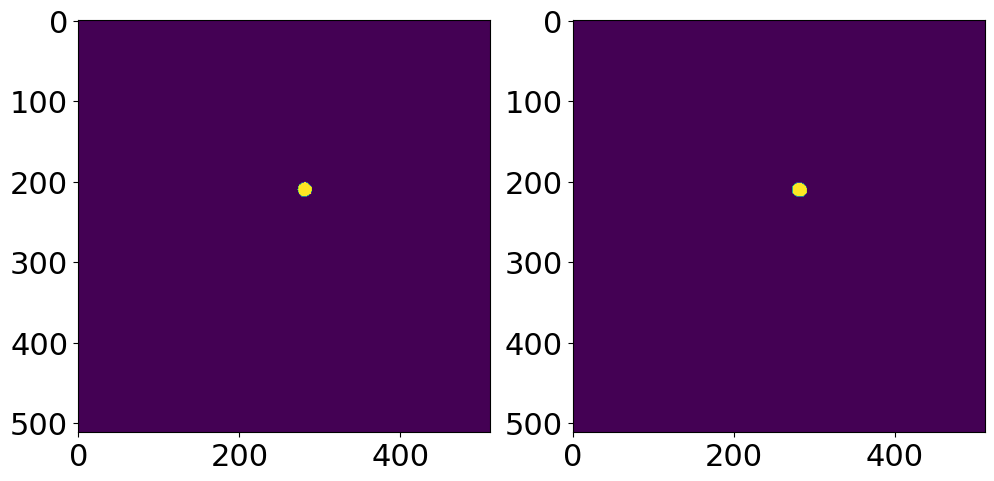

In [215]:
plt.subplot(1,2,1)
plt.imshow(bin_22[2])

plt.subplot(1,2,2)
plt.imshow(bin_limb[2])

In [171]:
calculate_dice_score_3d(np.array([bin_22[90]]), np.array([bin_limb[90]]))

IndexError: index 90 is out of bounds for axis 0 with size 51

In [217]:
calculate_dice_score_3d(bin_22, bin_limb)

0.9767831512698403

In [7]:

def calculate_ssim_3d(image1, image):
#     image1 = sitk.ReadImage(image1_path)
#     image2 = sitk.ReadImage(image2_path)

    # Calculate SSIM
    ssim_filter = sitk.SSIMImageFilter()
    ssim_value = ssim_filter.Execute(image1, image2)

    return ssim_value


In [12]:

def calculate_mutual_information(image1, image2):
    # Read the images
#     image1 = sitk.ReadImage(image1_path)
#     image2 = sitk.ReadImage(image2_path)

    # Instantiate the filter and execute
    mi_filter = sitk.MutualInformationImageFilter()
    mi_filter.Execute(image1, image2)

    # Get the Mutual Information value
    mutual_information = mi_filter.GetMutualInformation()

    return mutual_information


In [59]:
patient_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/19/'
CT1_path = patient_path+'20180411_CT_09_APR_2018/'
CT2_path = patient_path+'20180515_CT_10_MAY_2018/'

In [60]:
CT1 = generate_sitk_image(CT1_path)
CT2 = generate_sitk_image(CT2_path)

In [13]:
calculate_mutual_information(CT1,CT1)

AttributeError: module 'SimpleITK' has no attribute 'MutualInformationImageFilter'

In [2]:
# https://github.com/kurnianggoro/GSOC2017/blob/master/data/lbfmodel.yaml
facemark = cv2.face.createFacemarkLBF()
facemark.loadModel('/mnt/iDriveShare/Kayla/lbfmodel.yaml')

# Initialize the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
image = cv2.imread('/mnt/iDriveShare/Kayla/body1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




In [3]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

# If faces are found, detect landmarks
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    _, landmarks = facemark.fit(roi_gray)
    for landmark in landmarks:
        for x, y in landmark[0]:
            # Draw a circle on each landmark point
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

# # Display the output
# cv2.imshow('Facial Landmark Detection', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

()


# Facial Recognition

In [55]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [56]:
def numpy_to_pyvista(volume):
    grid = pv.StructuredGrid()
    
    grid.dimensions = np.array(volume.shape) + 1
    
    grid.origin = (0,0,0)
    grid.spacing = (1,1,1)
    
    grid.cell_arrays["values"] = volume.flatten(order="F")
    return grid

In [61]:
ct1_array = sitk.GetArrayFromImage(CT1)
ct2_array = sitk.GetArrayFromImage(CT2)

In [44]:
grid1 = numpy_to_pyvista(ct1_array)

AttributeError: 'StructuredGrid' object has no attribute 'cell_arrays'

In [14]:
verts, faces, normals, values = measure.marching_cubes(ct1_array,-500)
mesh = Poly3DCollection(verts[faces],alpha=0.1)

(0.0, 512.0)

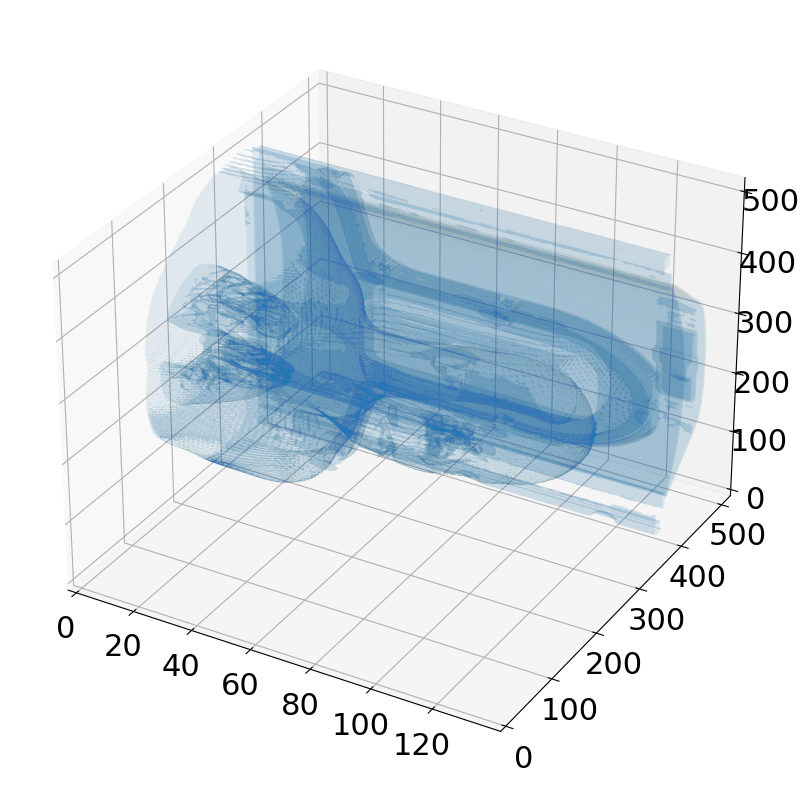

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
face_color=[0.5,0.5,1]
ax.add_collection3d(mesh)
ax.set_xlim(0,ct1_array.shape[0])
ax.set_ylim(0,ct1_array.shape[1])
ax.set_zlim(0,ct1_array.shape[2])

ValueError: Input could not be cast to an at-least-1D NumPy array

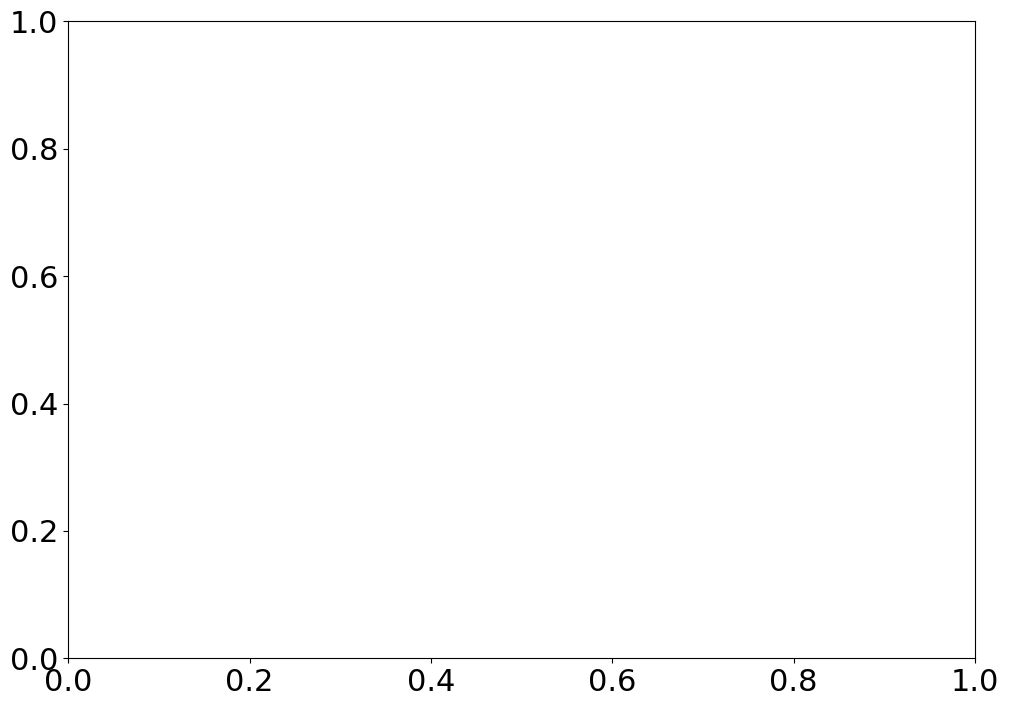

In [88]:
plt.plot(img_coords_22)

In [93]:
bin_22

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [114]:
verts, faces, normals, values = measure.marching_cubes(bin_22)
mesh = Poly3DCollection(verts[faces],alpha=.9)

ValueError: 5.88235294117647 is not a valid value for aspect; supported values are 'auto', 'equal', 'equalxy', 'equalyz', 'equalxz'

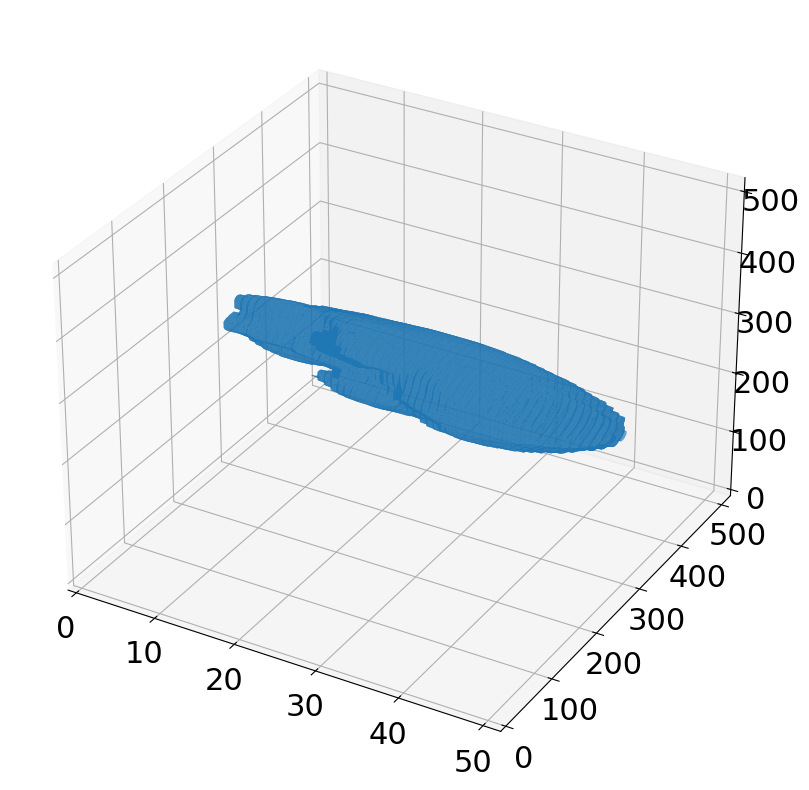

In [115]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
face_color=[0.5,0.5,.5]
ax.add_collection3d(mesh)
ax.set_xlim(0,bin_22.shape[0])
ax.set_ylim(0,bin_22.shape[1])
ax.set_zlim(0,bin_22.shape[2])
ax.set_aspect(3/.51)

In [107]:
# from vtkplotter import *

In [116]:
bin_22.shape

(51, 512, 512)

In [119]:
img_coords_22

[[248.4972635042721,
  272.3163940372463,
  2.0,
  250.5007417734008,
  271.43420401750654,
  2.0,
  252.49597527598985,
  271.43420401750654,
  2.0,
  254.4994535451185,
  271.43420401750654,
  2.0,
  256.5029318142472,
  271.43420401750654,
  2.0,
  258.4981653168362,
  271.33526681903106,
  2.0,
  260.24605582323653,
  272.49777890111807,
  2.0,
  260.50164358596487,
  272.70389806460867,
  2.0,
  261.85378529846327,
  274.50125717024673,
  2.0,
  262.49687708855396,
  275.944091314681,
  2.0,
  262.7936886839804,
  276.49649067283576,
  2.0,
  263.1894374778824,
  278.4999689419645,
  2.0,
  263.5604519721655,
  280.50344721109315,
  2.0,
  263.73359206949755,
  282.4986807136821,
  2.0,
  264.31072572727123,
  284.50215898281084,
  2.0,
  264.31072572727123,
  286.49739248539987,
  2.0,
  264.32721526035056,
  288.50087075452853,
  2.0,
  264.32721526035056,
  290.4961042571176,
  2.0,
  264.32721526035056,
  292.49958252624623,
  2.0,
  263.63465487102206,
  294.5030607953749,
  

In [122]:
import itkwidgets


In [166]:
from vedo import Volume
spacing = list(CT1.GetSpacing())
vol = Volume(ct1_array)#,spacing=spacing)

vol.permuteAxes(2, 1, 0).mirror("y")  # Adjust axes if needed
vol.show(bg="white")  # Display the 3D volume

AttributeError: 'Volume' object has no attribute 'permuteAxes'

In [131]:
print(CT1)

Image (0x3d510e0)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 6649
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1850
  UpdateMTime: 6645
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 139]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 139]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 139]
  Spacing: [1.16406, 1.16406, 3]
  Origin: [-298, -196, -728.5]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1.16406 0 0
0 1.16406 0
0 0 3

  PointToIndexMatrix: 
0.85906 0 0
0 0.85906 0
0 0 0.333333

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x3d48fc0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 

In [137]:
CT1.GetSpacing()

(1.1640625, 1.1640625, 3.0)

In [141]:
list(spacing)

[1.1640625, 1.1640625, 3.0]

In [155]:
from vedo import Points, show, Mesh

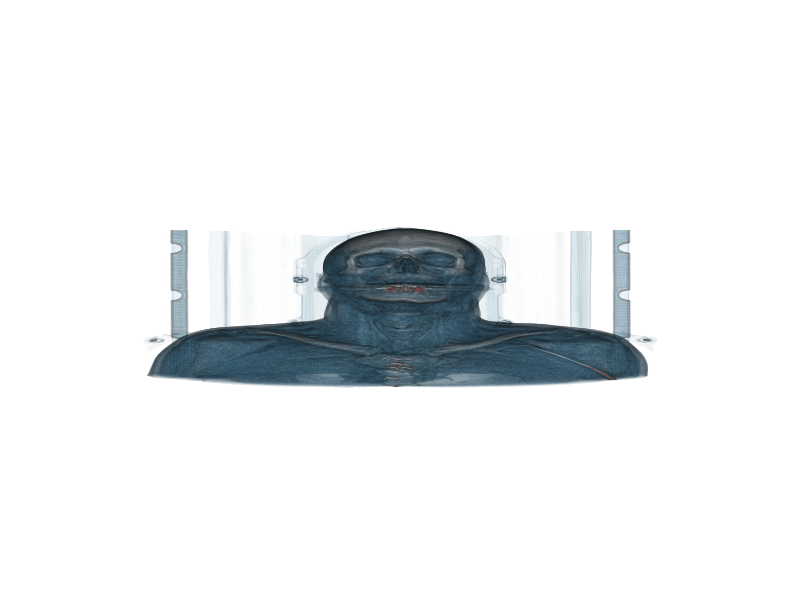

In [219]:

spacing = list(CT1.GetSpacing())
vol = Volume(ct1_array)#,spacing=spacing)
vol.rotate_z(90)
vol.rotate_y(270)


# vol.permuteAxes(2, 1, 0).mirror("y")  # Adjust axes if needed
vol.show(bg="white")  # Display the 3D volume

In [192]:
spacing

[1.1640625, 1.1640625, 3.0]

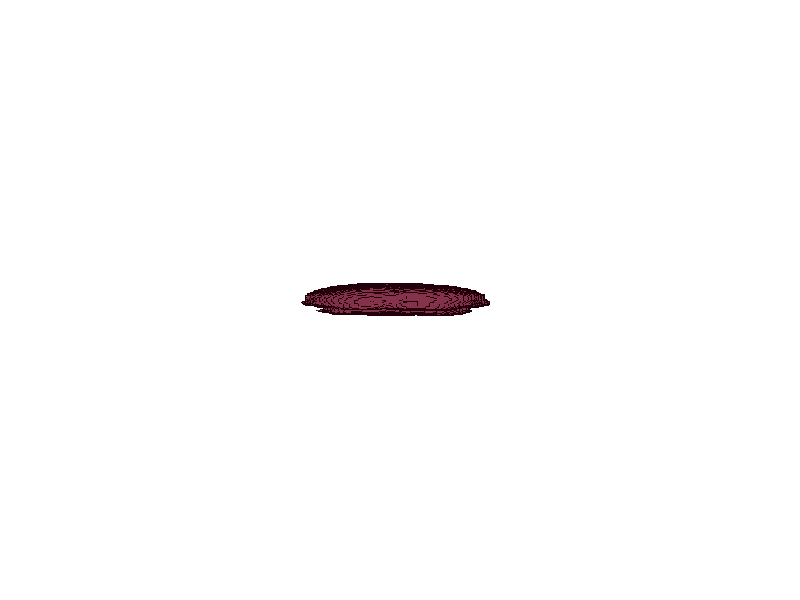

In [191]:

spacing = list(CT1.GetSpacing())
vol = Volume(bin_22,spacing=spacing)
vol.rotate_z(90)
vol.rotate_y(90)

vol.show(bg="white")  # Display the 3D volume

In [25]:
len(img_coords_22)
img_coords_22_long =  [element for nestedlist in img_coords_22 for element in nestedlist]
num_points = len(img_coords_22_long)//3
reshaped_data = np.array(img_coords_22_long).reshape(num_points,3)


NameError: name 'img_coords_22' is not defined

In [164]:
point_cloud = Points(reshaped_data, r=5,c='gray')

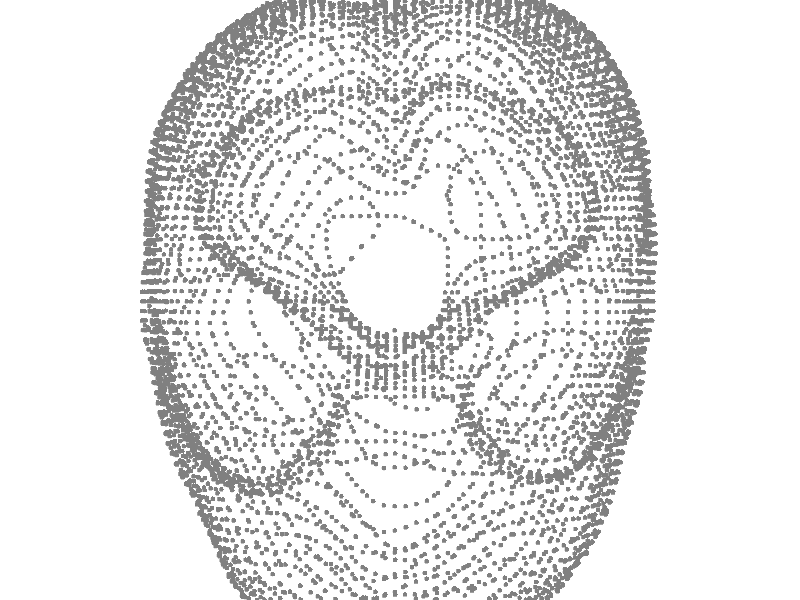

In [152]:
show(point_cloud)

In [175]:
# cloud = Points(img_coords_22_long)
mesh = Mesh(pc)

[vedo.mesh] ERROR: input must be a list of max 4 elements.


ValueError: 

In [173]:
flat_coords = img_coords_22_long
pc =[(flat_coords[i], flat_coords[i + 1], flat_coords[i + 2]) for i in range(0, len(flat_coords), 3)]


In [174]:
verts, faces, normals, values = measure.marching_cubes(pc)
mesh = Poly3DCollection(verts[faces],alpha=.9)

ValueError: Input volume should be a 3D numpy array.

In [63]:
origin = CT_dcm.ImagePositionPatient
spacing = [CT_dcm.PixelSpacing[0],CT_dcm.PixelSpacing[1],CT_dcm.SliceThickness]
print(origin,spacing)


[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']


In [64]:
cont_body,zs_body = get_all_ROI_contours(['BODY'],RS)
body = cont_body['BODY']
start_z = body[0][2]

In [67]:
img_coords_bod = xyz_to_image_coords_3D(body,spacing,[origin[0],origin[1],start_z])
max_z = max(int(s[2]) for s in img_coords_bod)
print(max_z)
bin_bod = get_binary_volume(img_coords_bod,max_z)

140


In [68]:
vol = Volume(bin_bod)#,spacing=spacing)
vol.rotate_z(90)
vol.rotate_y(270)

vol.show(bg="white")  # Display the 3D volume

NameError: name 'Volume' is not defined

In [95]:
import trame
import ipywidgets

In [96]:
pv.set_jupyter_backend('trame')

ImportError: Please install `trame` and `ipywidgets` to use this feature.

In [69]:
# flat_coords = img_coords_bod

pc = [x for xs in img_coords_bod for x in xs]

pts_array = np.array(pc).reshape(-1,3)
cloud = pv.PolyData(pts_array)


In [88]:
mesh = cloud.delaunay_3d(alpha=2)

2024-05-24 19:41:23.628 (17658.485s) [    7F3B6C472740]      vtkDelaunay3D.cxx:513   WARN| vtkDelaunay3D (0x584ac5b0): 17 degenerate triangles encountered, mesh quality suspect


In [100]:
mesh.plot()

Widget(value='<iframe src="http://localhost:41207/index.html?ui=P_0x7f3aaf6e1a30_16&reconnect=auto" class="pyv…

In [99]:
plotter = pv.Plotter()#window_size=(600, 400))
plotter.background_color = 'w'
plotter.enable_anti_aliasing()
plotter.add_mesh(mesh, color='beige')#, show_edges=True)
plotter.show()#jupyter_backend='static')

Widget(value='<iframe src="http://localhost:41207/index.html?ui=P_0x7f3aac87b580_15&reconnect=auto" class="pyv…

Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/data/kayla/p3venv/lib/python3.8/site-packages/trame/widgets/__init__.py)

Falling back to a static output.


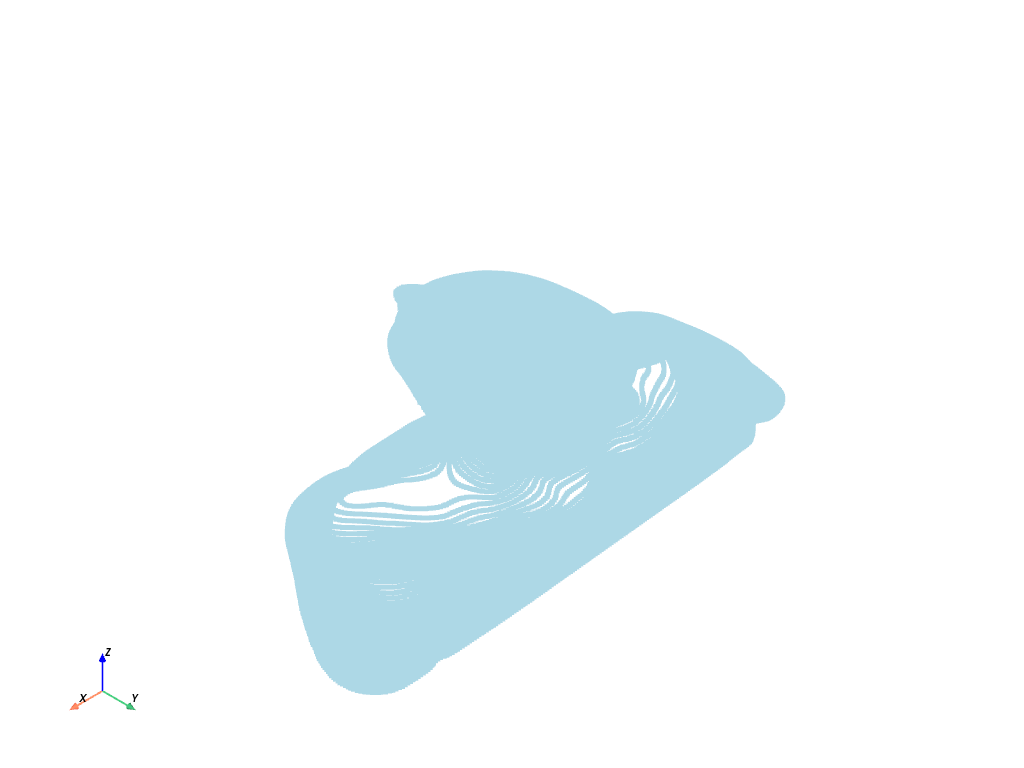

In [231]:
cloud.plot()

In [238]:
verts, faces, normals, values = measure.marching_cubes(pts_array,-100)
mesh = Poly3DCollection(verts[faces],alpha=0.1)

ValueError: Input volume should be a 3D numpy array.

In [239]:
pts_array

array([[190.50357566, 185.71336631,   0.        ],
       [192.49880917, 185.49900238,   0.        ],
       [194.50228744, 185.14447741,   0.        ],
       ...,
       [245.36425222, 258.49816532, 140.        ],
       [246.50203   , 257.60773053, 140.        ],
       [248.40657107, 256.50293181, 140.        ]])

In [16]:
### FROM HALEY

In [13]:
def get_pointcloud(ROI_Name, RS_filepath, excludeMultiPolygons=True):
    """
    Creates a formatted array of an ROI's vertex data in addition to an array of
    slice centroids using a Dicom RTStruct file as input.

    Parameters
    ----------
    ROI_Name : str
        The name of the ROI (region of interest) to retrive contour data for.
    RS_filepath : str
        The path to the RS-DICOM file.
    excludeMultiPolygons : bool, optional
        Flag to indicate if multiple closed polygonal regions on the same slice
        of the reference image are kept or not (primarily used to exclude points
        that define holes in the center of the main contour polygon). Defaults
        to True. If True, only the points comprising the largest contour on a
        slice are added to the output array.

    Returns
    -------
    contour : numpy.ndarray
        Array of the ROI's vertex data, formatted into a list of coordinate 
        points (M x 3).
    CoMList : numpy.ndarray
        Array of the centroid coordinates for each slice of the ROI (M x 3).

    Notes
    -------
    Because of how the function get_cubemarch_surface() handles pointcloud data,
    the user must explictly specify how to handle multiple closed polygons on the
    same axial slice of the image used for contouring. Failure to do this will 
    result in them being combined into one continous polygon. By default, only
    the largest polygons are kept per slice. If inclusion of multiple polygons
    is specified to be allowed by the user, a coordinate of np.nan values will
    be added to the output arrays to differentiate the additional polygons from
    the rest of the structure.
    """
    #Function updated April 2023 by HP to better account for the following situations:
        #- Cases where the contours are not drawn on axial image slices
        #- Cases where DICOM pointcloud data is not provided in ascending Z order
        #   (as has been observed for contours provided by MIMvista)
    #STEP 1: get the raw mesh data
    RS = dcm.read_file(RS_filepath)
    mesh =  get_all_ROI_contours(['BODY'],RS)[0]['BODY']
#     mesh = contourdata_from_dicom(ROI_Name, RS_filepath)
    #STEP2: prep output data arrays
    xdata, ydata, zdata = [], [], []
    Ztracking = [[],[],[]]     #used to check for duplicate Z (axial) indices
    CoMList = []
    extrax, extray, extraz = [], [], [] #holds point data for extra polygons per slice
    extraCOM = []
    nonAxialSlices = False  #flag to indicate if structure slices are not aligned with image slices
    #STEP3: begin adding data
    for plane in mesh:
        #get points for point cloud
        xvals = (plane[0::3])
        yvals = (plane[1::3])
        zvals = (plane[2::3])
        #STEP3A: Check if structure slices are aligned with axial imaging plane
            #If not aligned, rtdsm will report how unaligned the slices are and
            #will align the slice at its average Z location
        if len(list(set(zvals))) > 1 and nonAxialSlices==False:
            print('WARNING: Slice is angled away from axial image plane')
            zmax = min(zvals)
            zmin = max(zvals)
            indmin = zvals.index(zmin)
            indmax = zvals.index(zmax)
            p1,p2 = np.array([xvals[indmin],yvals[indmin],zmin]),np.array([xvals[indmax],yvals[indmax],zmax])
            h = np.linalg.norm(p1-p2)
            o = zmax - zmin
            angle = math.degrees(math.asin(o/h))
            print('angle:',angle,'degrees')
            nonAxialSlices = True
        if nonAxialSlices == True:
            #use the average Z position instead of the actual Z values
            zval = round(sum(zvals)/len(zvals),2)
            zvals = [zval] * len(zvals)
        else:
            zval = plane[2]
        #STEP3B: Get the slice's polygon and calculate its area and CoM
        points = np.array([plane[0::3],plane[1::3]]).T
        area, COM = PolygonArea(points[:,0],points[:,1]), list(np.append(points.mean(axis=0),[zval]))
        #STEP3C: Check for other slices at the same Z location. If another slice
            #does exist, the largest will be kept and the smaller will be saved
            #to a secondary array that is added at the end of the pointcloud array
            #after a buffer of NaN data
            #NOTE: this is done to accomadate the method used to create the
            #the surface mesh of the contour
        if zval in Ztracking[0] and area > Ztracking[1][Ztracking[0].index(zval)]:
            #The prexisting slice is smaller. Replace with the new one
            extraCOM.append(CoMList[Ztracking[0].index(zval)]) #swap and update the COMs
            CoMList[Ztracking[0].index(zval)] = COM
            Ztracking[1][Ztracking[0].index(zval)] = area #update the area in the tracking
            Ztracking[2][Ztracking[0].index(zval)] += 1
            #move the smaller polygon points to the extra arrays
            oldindex = zdata.index(zvals[0])
            if Ztracking[2][Ztracking[0].index(zval)] > 2:
                extrax.append(np.nan)   #done to seperate two polygons on the same slice
                extray.append(np.nan)
                extraz.append(np.nan)
            extrax.extend(xdata[oldindex:])
            extray.extend(ydata[oldindex:])
            extraz.extend(zdata[oldindex:])
            #replace the old pointcloud ones with new
            xdata, ydata, zdata = xdata[:oldindex], ydata[:oldindex], zdata[:oldindex]
            xdata.extend(xvals)
            ydata.extend(yvals)
            zdata.extend(zvals)
        elif zval in Ztracking[0]:
            #The prexisting slice is larger. Add the new one to the extra array
            Ztracking[2][Ztracking[0].index(zval)] += 1
            extraCOM.append(COM)
            if Ztracking[2][Ztracking[0].index(zval)] > 2:
                extrax.append(np.nan)   #done to seperate two polygons on the same slice
                extray.append(np.nan)
                extraz.append(np.nan)
            extrax.extend(xvals)
            extray.extend(yvals)
            extraz.extend(zvals)
        else:
            #No other polygon exists on the slice, proceed normally
            Ztracking[0].append(zval)
            Ztracking[1].append(area)
            Ztracking[2].append(1)
            CoMList.append(COM)
            xdata.extend(xvals)
            ydata.extend(yvals)
            zdata.extend(zvals)
    #STEP 4: Final cleanup of the data
    #STEP4A: If excludeMultiPolygons FALSE, append extra arrays to the normal ones
    if excludeMultiPolygons == False and len(extraz)>0:
        if zdata[-1] == extraz[0]:
            xdata.append(np.nan)    #add a row of nan data if needed to prevent
            ydata.append(np.nan)    #point data for two polygons on the same slice
            zdata.append(np.nan)    #being confused as a single polygon
        xdata.extend(extrax)
        ydata.extend(extray)
        zdata.extend(extraz)
        CoMList.extend(extraCOM)
    #STEP4B: Ensure CoM data is presented in ascending Z position order
    CoMList = np.asarray(CoMList)
    if (CoMList[0,2] > CoMList[-1,2]):
        CoMList = np.flipud(CoMList)
        extraCOM = np.flipud(extraCOM)
        #the pointcloud data does not need to be switched as get_cubemarch_surface()
        #will do it automatically 
    #STEP5: Return the pointcloud and CoM data
    contour = np.array([xdata,ydata,zdata]).T
    return contour, CoMList

In [14]:
# def contourdata_from_dicom(ROI_Name, RS_filepath):
#     """
#     Extracts the raw contour vertex data of a specified ROI from a RS-DICOM file.

#     Parameters
#     ----------
#     ROI_Name : str
#         The name of the ROI (region of interest) to retrive contour data for.
#     RS_filepath : str
#         The path to the RS-DICOM file.

#     Returns
#     -------
#     contour : numpy.ndarray
#         An array of the raw contour vertex data of the ROI. See Notes for 
#         details.

#     See Also
#     --------
#     get_pointcloud : Returns formatted contour point data and slice 
#     centroids.

#     Notes
#     ------
#     Contour data is returned in the same format it is stored in the Dicom. This 
#     is in the form of n 1D arrays, where n is the number of closed polygonal 
#     slices that comprise the contour. The points that comprise each slice are
#     given in the 1D arrays as a sequence of (x,y,z) triplets in the Patient-
#     Based Coordinate System.

#     If the ROI name given does not exist in the Dicom file, the function
#     returns the list of ROIs in the file and raises an exception.
#     """
#     #STEP1: Open the Dicom file and check if the requested ROI is present
#     rs = pydicom.read_file(RS_filepath)
#     ROI_index,ROIlist = None,[]
#     for index, item in enumerate(rs.StructureSetROISequence):
#         ROIlist.append(item.ROIName)
#         if item.ROIName == ROI_Name:
#             ROI_index = index
#             break
#     if ROI_index == None:
#         raise Exception('An ROI with the name specified does not exist in the Dicom file. The available structures are:\n',ROIlist)
#     #STEP2: Get all contour points from RS file (organized as: [[x0-N, y0-N, z0-N][x0-N, y0-N, z0-N]] )
#     contour = []
#     for item in rs.ROIContourSequence[ROI_index].ContourSequence:
#         contour.append(item.ContourData)
#     return np.array(contour)

In [15]:
def PolygonArea(x,y):
    """
    Uses Gauss's shoelace algorithm to estimate the area of a polygon.

    Parameters
    ----------
    x, y : list or numpy.ndarray
        X and Y coordinates of points comprising the polygon

    Returns
    ----------
    area : float
        Area of the polygon.
    """
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [16]:
from skimage.draw import polygon
from skimage.measure import marching_cubes

In [17]:
def get_cubemarch_surface(PointArray,VoxSize):
    """
    Creates a surface mesh of an ROI from a pointcloud dataset using the marching
    cubes algorithm.
                
    Parameters
    ----------
    PointArray : numpy.ndarray     
        An array of point coordinates representing the vertices of the desired mesh.
    VoxSize : numpy.ndarray or list       
        The dimensions (x,y,z) of a voxel in the image the ROI was generated from.
        Required to create the mask used by the matching cube algorithm.

    Returns
    -------
    MmVerts : numpy.ndarray        
        An array of the vertices of the final mesh.
    faces : numpy.ndarray         
        A 2D array specifying the faces of the mesh. Each row lists the indices
        of the vertices that comprise one face.
    pvFaces : numpy.ndarray         
        The same data as faces, just pre-formatted in a pyvista readable array 
        (each row begins with the number of vertices that define the face).

    Notes
    -----
    Meshes created with a marching cubes algorithm will not include holes (like some Delaunay
    meshes do that can cause issues for other functions in this package), but will be 
    somewhat voxelated. For this reason it is recommended to apply smoothing to the ROI mesh
    once formatted as a pyvista.PolyData object. 
    """
    #STEP1: Get the min X,Y values to set the top corner of the slices
    Xmin,Ymin = np.nanmin(PointArray[:,0]),np.nanmin(PointArray[:,1])
    Zmin = np.nanmin(PointArray[:,2])
    CornerOrg = [Xmin - 2*VoxSize[0], Ymin - 2*VoxSize[1]]
    #STEP2: convert the XY values to index positions in a 3D array 
    PointArray[:,0] = np.round((PointArray[:,0]-CornerOrg[0])/VoxSize[0])
    PointArray[:,1] = np.round((PointArray[:,1]-CornerOrg[1])/VoxSize[1])

    #STEP3: Determine how many slices are needed to cover the full structure and make an empty grid
    uniqueSlices = np.unique(PointArray[:,2][~np.isnan(PointArray[:,2])])
    nSlices = len(uniqueSlices)
    GridMaxInd = np.nanmax(PointArray[:,:2])   #the max of the X and Y index values
    MaskGrid = np.zeros((int(nSlices),int(GridMaxInd +2),int(GridMaxInd+2))) #NOTE: using ZYX here
    #STEP4: Make a list of the indices where the slice number changes
    deltaslice = PointArray[:,2] - np.roll(PointArray[:,2],1)
    Slices = np.where(deltaslice != 0)[0] #indexes where a new polygon begins
    for i in range(len(Slices)):
        CurrentSlice = PointArray[Slices[i],2]
        if np.isnan(CurrentSlice):
            continue
        #get the list of points for that polygon
        end = -1 if i == len(Slices)-1 else Slices[i+1]
        iPoints = PointArray[Slices[i]:end,:2] #just need the X and Y points
        #Make a polygon mask from the points
        rr, cc = polygon(iPoints[:,1], iPoints[:,0])        #r AKA row is Y, c AKA col is X
        sliceInd = np.where(uniqueSlices == CurrentSlice)[0]
        MaskGrid[sliceInd,rr, cc] = 1
    #STEP5: using the 3D mask, run the marching cube algorithm
        verts, faces, normals, values = marching_cubes(MaskGrid)
    #STEP6: Convert the vertices back to mm in the patient coordinate system
    MmVerts = np.zeros(np.shape(verts))
    MmVerts[:,2] =  verts[:,0]*VoxSize[2]+ np.nanmin(PointArray[:,2])#convert Z inds to mm positions
    MmVerts[:,1] =  verts[:,1]*VoxSize[1]+ CornerOrg[1] #convert Y inds to mm positions
    MmVerts[:,0] =  verts[:,2]*VoxSize[0]+ CornerOrg[0] #convert X inds to mm positions
    # also, create an array of face information in a pyvista readable format
    pvFaces = np.zeros((len(faces),4),dtype=np.uint16)
    pvFaces[:,0],pvFaces[:,1],pvFaces[:,2],pvFaces[:,3] = 3, faces[:,0], faces[:,1], faces[:,2] 
    return MmVerts, faces, pvFaces

In [18]:
import pydicom

In [10]:
RS_path = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/OG_CT/RS.1.2.246.352.221.54162806448186087767563333417651109794.dcm'


In [11]:
pointdata, centroiddata = get_pointcloud('BODY',RS_path)

NameError: name 'get_pointcloud' is not defined

In [12]:
RS = dcm.read_file(RS_path) 
# get_all_ROI_contours(['BODY'],RS)[0]['BODY']

In [42]:
type(spacing[0])

pydicom.valuerep.DSfloat

In [30]:
imgres = spacing#[0.908, 0.908, 2.0]
verts, faces, pvfaces = get_cubemarch_surface(pointdata, imgres)

###############################################################################
# We now have vertex and face data for the connected mesh. Face data is provided
# in two  differently formatted arrays: faces, in which each row is the set of
# vertex indices that comprise the face, and pvfaces, which also includes the
# additional information of how many vertices comprise each face. This alternate
# format is required in order to create a pyvista.PolyData mesh from face and
# vertex data.

mesh = pv.PolyData(verts, faces=pvfaces)
surf = mesh.extract_geometry()  #extracts the outer surface of the mesh



In [24]:

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D, art3d

/data/kayla/p3venv/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/data/kayla/p3venv/lib/python3.8/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


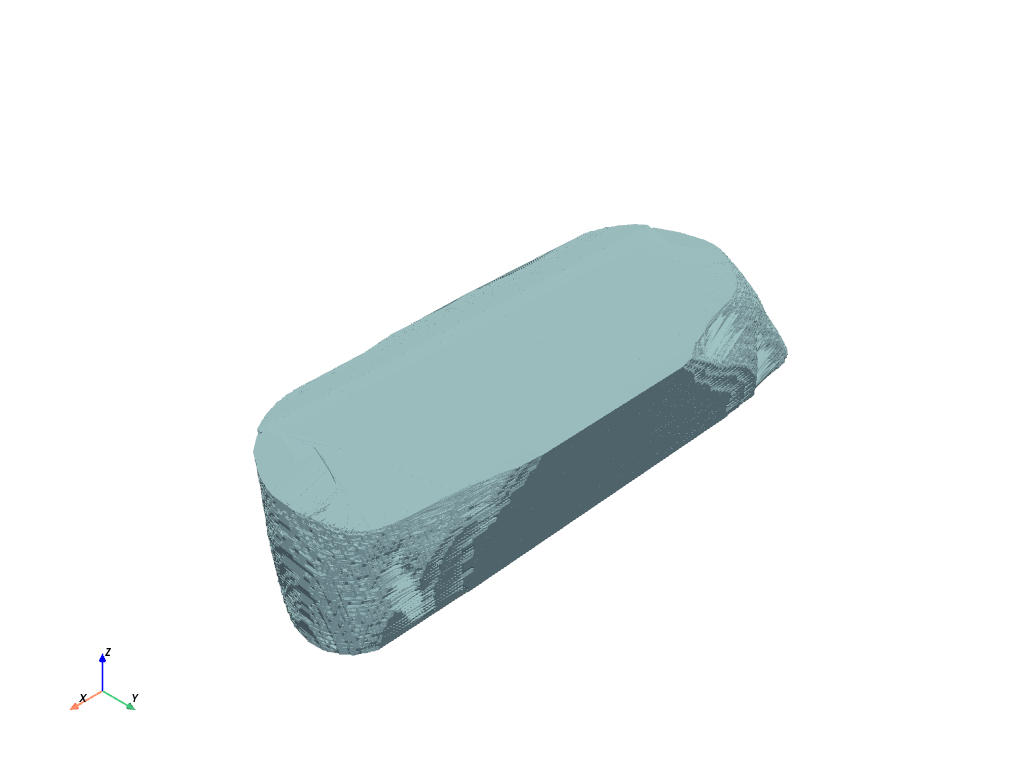

In [45]:
mesh.plot()

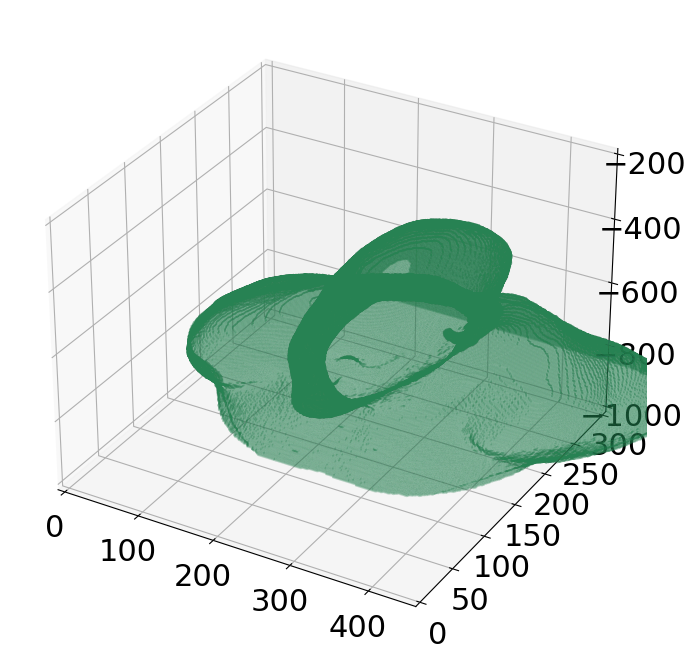

In [49]:
###############################################################################
# If we plot the surface mesh in its current form we can see it’s slightly
# voxelated due to the mask used to create it. In order to remedy this we can
# apply smoothing to the surface to create a  cleaner mesh. Typically 200-250
# iterations is enough to yield a clean mesh without over smoothing.

fig = plt.figure()
ax =  fig.add_subplot(111, projection='3d')   # enable 3D plotting
# ax.view_init(azim=10,elev=5)
ax.set_zlim(-1000,-200)
ax.set_ylim(0,300)
ax.set_xlim(0,450)
# plot the mesh
pc = art3d.Poly3DCollection(verts[faces], facecolors="#9FE2BF08", edgecolor="#27825315") 
ax.add_collection(pc)  
plt.show()



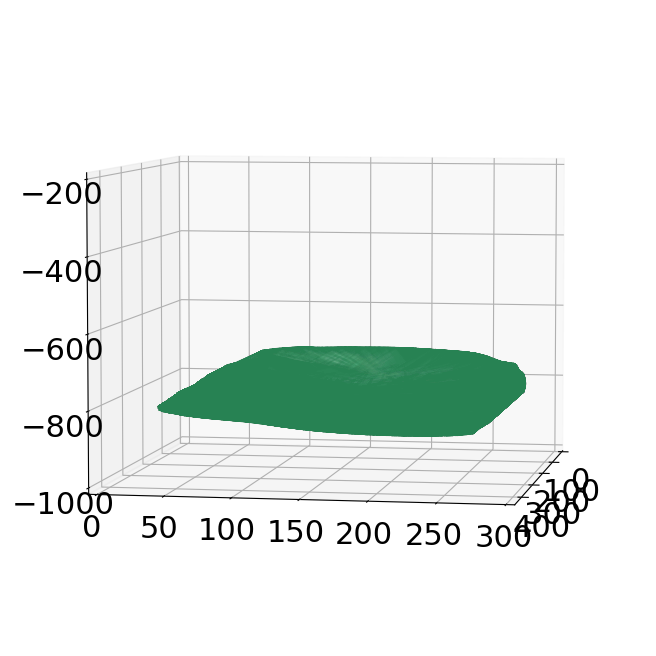

In [51]:
# Smooth the pyvista mesh and plot the updated version
surf = surf.smooth(n_iter=200)
vNew, fNew = surf.points, surf.faces.reshape(-1,4)[:, 1:] #retrive the face and vertex data

fig = plt.figure()
ax =  fig.add_subplot(111, projection='3d')     # enable 3D plotting
ax.view_init(azim=10,elev=5)
# ax.set_zlim(-35,40)
# ax.set_ylim(20,70)
# ax.set_xlim(-25,25)
ax.set_zlim(-1000,-200)
ax.set_ylim(0,300)
ax.set_xlim(0,450)
# plot the mesh
pc = art3d.Poly3DCollection(vNew[fNew], facecolors="#9FE2BF08", edgecolor="#27825315") 
ax.add_collection(pc)  
plt.show()

In [39]:
verts

array([[ 223.95898438,   32.92871094, -807.5       ],
       [ 223.35253906,   33.53515625, -807.5       ],
       [ 223.95898438,   33.53515625, -806.        ],
       ...,
       [ 312.5       ,  187.57226562, -389.        ],
       [ 313.71289062,  187.57226562, -389.        ],
       [ 314.92578125,  187.57226562, -389.        ]])

In [ ]:
surf = ax.plot_surface(x, y, z, cmap = my_cmap,
                       edgecolor ='none')

In [1]:

# from three import BufferGeometry, Vector3, Mesh, MeshPhongMaterial, Float32BufferAttribute, Uint8Array

def distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def closest_index(x, y, array):
    dist = distance(x, y, array[0], array[1])
    index = 0
    for j in range(2, len(array), 2):
        newdist = distance(x, y, array[j], array[j+1])
        if newdist < dist:
            dist = newdist
            index = j
    return index

def render_body(slices, keys):
    pts = []  # The 3D points making up the entire body
    indices = []  # The indices of those points ordered in such a way that it forms a triangular mesh
    curr = 0  # The index of the current point (in the overall pts array, not of the current slice)
    colours = []  # The array of colours assigned to each point

    # Sort slice height (z) to be floats and in order
    keys.sort()

    # Loop through each slice to form triangle faces between current and subsequent slice
    for i in range(len(keys)):
        z = float(keys[i])  # the z value (height) of the slice
        slice = []  # stores the x and y values of each point in the slice (they all have the same z value)
        slice2 = []

        # Parse the slice data
        slice = slices[keys[i]]
#         print(len(slice))

        # Do not do for last slice since it will have already been connected to the previous slice
#         print(len(keys))
        if i < len(keys) - 1:
            slice2 = slices[keys[i+1]]
#             print(len(slice2))

        # Loop through the points in the current slice
        index = 0
        for j in range(0, len(slice), 2):
            pts.extend([slice[j], slice[j+1], z])

            # If first iteration, find starting point on second slice (this ensure both slices align)
            if j == 0 and i != len(keys)-1:
                index = closest_index(slice[j], slice[j+1], slice2)

#             # Check if point is inside one of the beams (stored in meshes array) and sets colour accordingly
#             point = Vector3(slice[j], slice[j+1], z)
#             is_inside = False

#             for mesh in meshes:
#                 if ConvexHull(mesh).containsPoint(point):
#                     is_inside = True
#                     break
#             if is_inside:
#                 colours.extend([153, 153, 255])  # blue
#             else:
#                 colours.extend([127, 127, 127])  # grey

            # Algorithm to create two triangular faces (between points [c,a,d] and [a,b,d] per point
            if j != len(slice)-2 and i != len(keys)-1:
                a = curr
                b = curr - j//2 + len(slice)//2 + ((index//2)+j//2) % (len(slice2)//2)
                c = curr + 1
                d = curr - j//2 + len(slice)//2 + ((index//2)+j//2 +1) % (len(slice2)//2)

                indices.extend([c, a, d])
                indices.extend([a, b, d])

            # For the final point in the slice, algorithm is such that it links back to first points of each slice
            if j == len(slice)-2 and i != len(keys)-1:
                a = curr
                b = curr + (((index//2) + len(slice2)//2) ) % (len(slice2)//2)
                if index == 0:
                    b += len(slice2)//2
                c = curr - j//2
                d = curr + 1 + ((index//2)) % (len(slice2)//2)

                indices.extend([c, a, d])
                indices.extend([a, b, d])

            # Algorithm to cap top and bottom slices (creates triangles across the slice instead of to next slice)
            if (i == len(keys)-1 or i == 0) and j == 0:
                for k in range(1, len(slice)//4):
                    a = curr + k - 1
                    b = curr + (len(slice)//2 - k)
                    c = curr + k
                    d = curr + (len(slice)//2 - k - 1)

                    indices.extend([c, a, d])
                    indices.extend([a, b, d])

            curr += 1
    return pts, indices

    # Create buffer geometry from points and set index and position attributes
#     geo = BufferGeometry()
#     geo.set_index(indices)
#     geo.set_attribute('position', Float32BufferAttribute(pts, 3))

#     geo.compute_bounding_sphere()
#     geo.compute_vertex_normals()

#     # Set colour attribute
#     colours = Uint8Array(colours)
#     geo.set_attribute('color', BufferAttribute(colours, 3, True))
#     geo.attributes.color.normalized = True

#     # Create final mesh
#     mesh = Mesh(geo, MeshPhongMaterial(vertex_colors=VertexColors, side=DoubleSide, shininess=0))
#     group.add(mesh)

In [16]:
##### import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import pydicom as dcm
import os,sys
from scipy import stats
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import pyvista as pv
from scipy.interpolate import griddata
import matplotlib.tri as mtri
from scipy.spatial import Delaunay
from scipy.optimize import curve_fit
from scipy import interpolate
from matplotlib import cm

In [2]:
def generate_mesh_from_RS(RS, structure, z_min=None, z_max=None):#z_cutoff=None):
    dict_contours, z_lists = get_all_ROI_contours([structure], RS)
    full_stack, keys = get_contour_stack(structure, dict_contours)
    
#     if z_cutoff is not None:
#         for key in keys.copy():
#             print(key)
#             if key < z_cutoff:
# #                 print(key)
#                 full_stack.pop(key)
#                 keys.remove(key)
        
    if z_min is not None or z_max is not None:
        if z_min is None:
            z_min = min(keys)
        if z_max is None:
            z_max = max(keys)
            
        for key in keys.copy():
            print(key)
            if key < z_min or key > z_max:
#                 print(key)
                if key in full_stack:
                    full_stack.pop(key)
                if key in keys:
                    keys.remove(key)
    print(full_stack.keys())
    
    
    return triangulate_structure(full_stack, keys)

In [3]:
def triangulate_structure(full_stack, keys):
    pts, indices = render_body(full_stack,keys)
    triangles = [indices[i:i+3] for i in range(0, len(indices), 3)]
    
    return pts, triangles
    

In [22]:

ptsL, trianglesL = generate_mesh_from_RS(RS,'BODY',z_max=7)

-807.5
-804.5
-801.5
-798.5
-795.5
-792.5
-789.5
-786.5
-783.5
-780.5
-777.5
-774.5
-771.5
-768.5
-765.5
-762.5
-759.5
-756.5
-753.5
-750.5
-747.5
-744.5
-741.5
-738.5
-735.5
-732.5
-729.5
-726.5
-723.5
-720.5
-717.5
-714.5
-711.5
-708.5
-705.5
-702.5
-699.5
-696.5
-693.5
-690.5
-687.5
-684.5
-681.5
-678.5
-675.5
-672.5
-669.5
-666.5
-663.5
-660.5
-657.5
-654.5
-651.5
-648.5
-645.5
-642.5
-639.5
-636.5
-633.5
-630.5
-627.5
-624.5
-621.5
-618.5
-615.5
-612.5
-609.5
-606.5
-603.5
-600.5
-597.5
-594.5
-591.5
-588.5
-585.5
-582.5
-579.5
-576.5
-573.5
-570.5
-567.5
-564.5
-561.5
-558.5
-555.5
-552.5
-549.5
-546.5
-543.5
-540.5
-537.5
-534.5
-531.5
-528.5
-525.5
-522.5
-519.5
-516.5
-513.5
-510.5
-507.5
-504.5
-501.5
-498.5
-495.5
-492.5
-489.5
-486.5
-483.5
-480.5
-477.5
-474.5
-471.5
-468.5
-465.5
-462.5
-459.5
-456.5
-453.5
-450.5
-447.5
-444.5
-441.5
-438.5
-435.5
-432.5
-429.5
-426.5
-423.5
-420.5
-417.5
-414.5
-411.5
-408.5
-405.5
-402.5
-399.5
-396.5
-393.5
-390.5
-387.5
dict_keys(['-

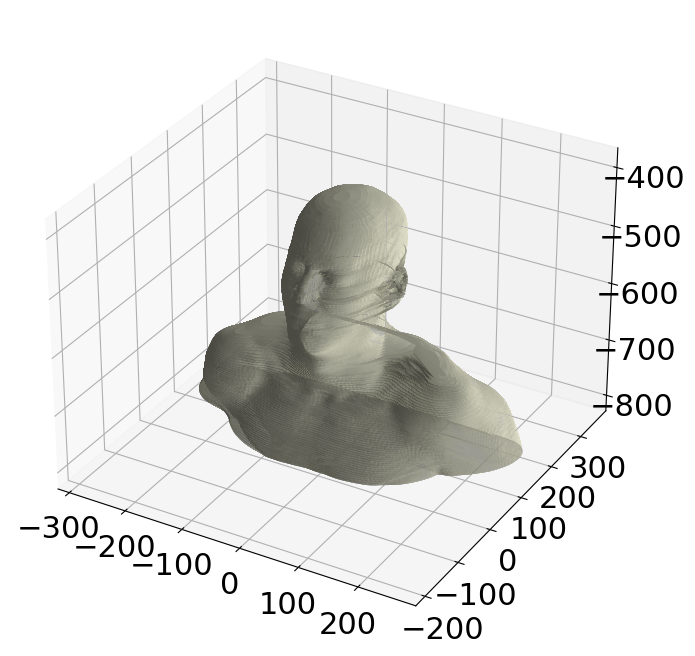

In [24]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(ptsL[::3], ptsL[1::3], ptsL[2::3], triangles=trianglesL, alpha=1, shade=True,color='beige')  
ax.set_aspect('equal', adjustable='box')
plt.show()

In [21]:
def get_contour_stack(contour_name, dict_contours,cutoff=-1000):
    XN = []
    YN = []
    ZN = []
    fullN = []
    full_stack_N = []
    y_prev = 0
    x_prev = 0
    for c in dict_contours[contour_name]:
    #     print(c)
        test = c
    #     full = full + list(c)
        slice = []

        if c[2] < cutoff:
            continue

        for i in range(0,len(c),3):

            x = test[i]
            y = test[i+1]
            z = test[i+2]

            if not (y== y_prev and x==x_prev): # ensure interpolation functin oworks
                XN.append(x)
                YN.append(y)
                ZN.append(z)
                fullN.append([x,y,z])
                slice = slice + [x,y,z]
            y_prev = y
            x_prev = x

        full_stack_N.append(slice)
        
            # full_stack = full_stack_N
    
    full_stack_int = {}
    keys = []


    for slice in full_stack_N:
        
    #     print(slice)
    #     break
        xi, yi, zi = slice[::3], slice[1::3], slice[2::3]
#         print(zi[0])
        # Append starting coordinates to make it closed
    #     xi = np.r_[xi, xi]
    #     yi = np.r_[yi, yi]

        keys.append(zi[0])
        # Fit spline with s=0 (passing through all points)
        tck, u = interpolate.splprep([xi, yi], s=0, per=True)

        # Evaluate spline for 1000 evenly spaced points
        xj, yj = interpolate.splev(np.linspace(0, 1, 10000), tck)
        zj = [zi[0]]*10000
        full_stack_int[zi[0]] = []
        print
        for i in range(len(zj)):
            full_stack_int[zi[0]].append(xj[i]) 
            full_stack_int[zi[0]].append(yj[i])

    return full_stack_int, keys



    

In [28]:
data_list = ptsL

In [ ]:
x_list = my_list[::3]
y_list = my_list[1::3]
z_list = my_list[2::3]

In [29]:
contour_data = [data_list[i:i + 3] for i in range(0, len(data_list), 3)]

In [30]:
contour_data = np.array(contour_data)

# Create an image from the numpy array
image = sitk.GetImageFromArray(contour_data)

In [34]:
# Apply a smoothing filter
image = sitk.CurvatureFlow(image1=image, timeStep=0.125, numberOfIterations=5)

# Use the SimpleITK Show command to visualize the 3D image
# sitk.Show(image, "CT Scan",debugOn=True)

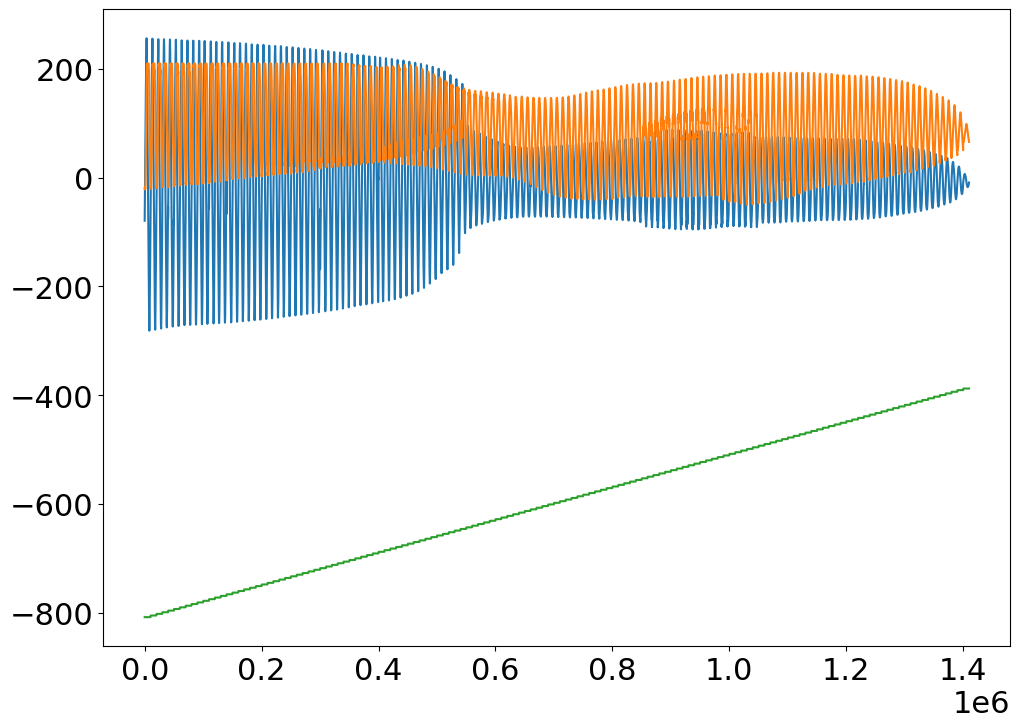

In [39]:
plt.plot(sitk.GetArrayFromImage(image))

ValueError: not enough values to unpack (expected 3, got 2)

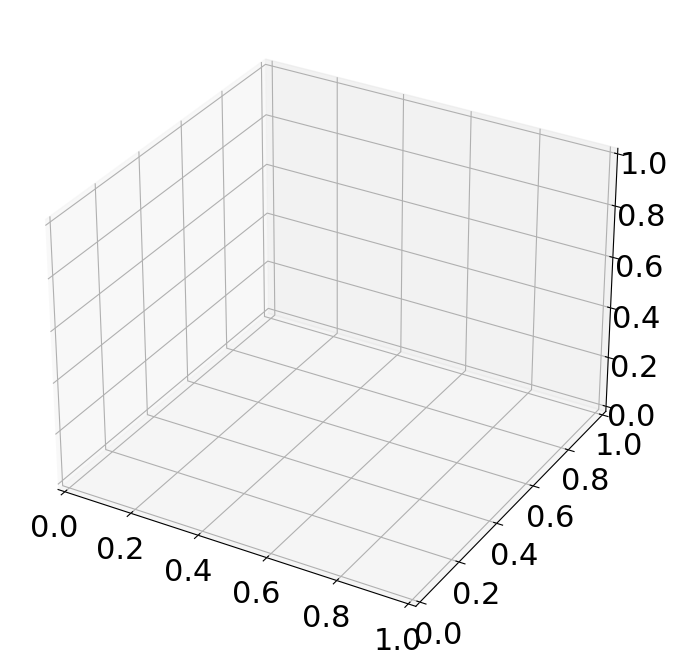

In [33]:
# Convert the image to a NumPy array
nda = sitk.GetArrayFromImage(image)

# Create a figure
fig = plt.figure()

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Get the shape of the array
x_size, y_size, z_size = nda.shape

# Generate coordinates for the voxels
x, y, z = np.indices((x_size, y_size, z_size))

In [31]:
CT1 = generate_sitk_image("/mnt/iDriveShare/Kayla/CBCT_images/anonymized/phant/anon/")

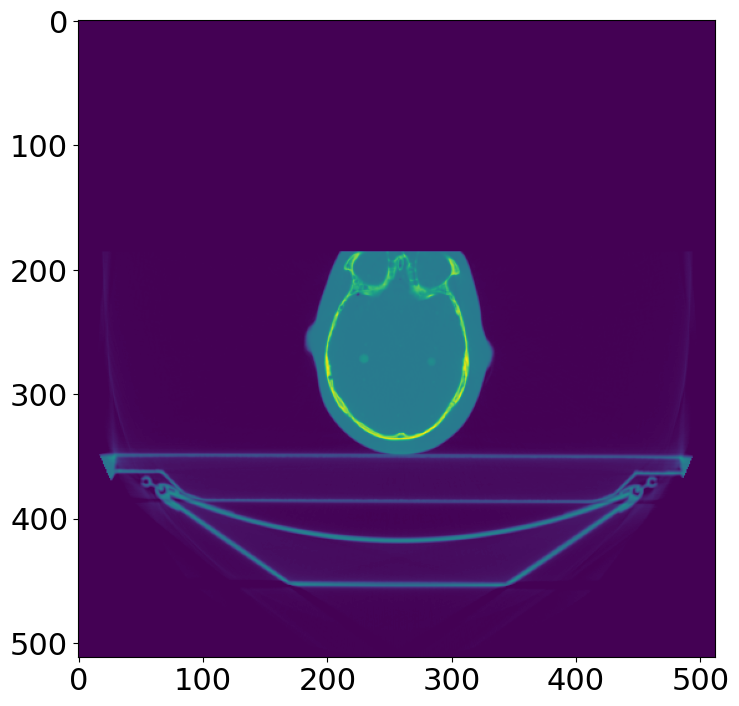

In [32]:
plt.imshow(sitk.GetArrayFromImage(CT1)[100])

In [17]:
import pydicom as dcm

In [ ]:
dcm.read_file()

In [34]:
# for x in CT1:
# img = sitk.GetImageFromArray(x)
sitk.WriteImage(CT1, "your_image_name_here.dcm")

RuntimeError: Exception thrown in SimpleITK ImageFileWriter_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/GDCM/src/itkGDCMImageIO.cxx:1392:
ITK ERROR: GDCMImageIO(0x62e97c0): DICOM does not support this component type

In [43]:
data_directory = "/mnt/iDriveShare/Kayla/CBCT_images/anonymized/phant/anon/"
series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs("/mnt/iDriveShare/Kayla/CBCT_images/anonymized/phant/anon/")

series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_IDs[0])

series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)


# series_reader = sitk.ImageSeriesReader()
# series_reader.SetFileNames("/mnt/iDriveShare/Kayla/CBCT_images/anonymized/phant/anon/")
series_reader.MetaDataDictionaryArrayUpdateOn()
series_reader.LoadPrivateTagsOn()
image3D = series_reader.Execute()

In [44]:
filtered_image = image3D

In [46]:
writer = sitk.ImageFileWriter()
# Use the study/series/frame of reference information given in the meta-data
# dictionary and not the automatically generated information from the file IO
writer.KeepOriginalImageUIDOn()

# Copy relevant tags from the original meta-data dictionary (private tags are also
# accessible).
tags_to_copy = ["0010|0010", # Patient Name
                "0010|0020", # Patient ID
                "0010|0030", # Patient Birth Date
                "0020|000D", # Study Instance UID, for machine consumption
                "0020|0010", # Study ID, for human consumption
                "0008|0020", # Study Date
                "0008|0030", # Study Time
                "0008|0050", # Accession Number
                "0008|0060"  # Modality
]

modification_time = time.strftime("%H%M%S")
modification_date = time.strftime("%Y%m%d")

# Copy some of the tags and add the relevant tags indicating the change.
# For the series instance UID (0020|000e), each of the components is a number, cannot start
# with zero, and separated by a '.' We create a unique series ID using the date and time.
# tags of interest:
direction = filtered_image.GetDirection()
series_tag_values = [(k, series_reader.GetMetaData(0,k)) for k in tags_to_copy if series_reader.HasMetaDataKey(0,k)] + \
                 [("0008|0031",modification_time), # Series Time
                  ("0008|0021",modification_date), # Series Date
                  ("0008|0008","DERIVED\\SECONDARY"), # Image Type
                  ("0020|000e", "1.2.826.0.1.3680043.2.1125."+modification_date+".1"+modification_time), # Series Instance UID
                  ("0020|0037", '\\'.join(map(str, (direction[0], direction[3], direction[6],# Image Orientation (Patient)
                                                    direction[1],direction[4],direction[7])))),
                  ("0008|103e", series_reader.GetMetaData(0,"0008|103e") + " Processed-SimpleITK")] # Series Description

for i in range(filtered_image.GetDepth()):
    image_slice = filtered_image[:,:,i]
    # Tags shared by the series.
    for tag, value in series_tag_values:
        image_slice.SetMetaData(tag, value)
    # Slice specific tags.
    image_slice.SetMetaData("0008|0012", time.strftime("%Y%m%d")) # Instance Creation Date
    image_slice.SetMetaData("0008|0013", time.strftime("%H%M%S")) # Instance Creation Time
    image_slice.SetMetaData("0020|0032", '\\'.join(map(str,filtered_image.TransformIndexToPhysicalPoint((0,0,i))))) # Image Position (Patient)
    image_slice.SetMetaData("0020|0013", str(i)) # Instance Number

    # Write to the output directory and add the extension dcm, to force writing in DICOM format.
    writer.SetFileName(os.path.join('/data/kayla/anon_imgs/phant2/',str(i)+'.dcm'))
    writer.Execute(image_slice)
# sys.exit( 0 )